### Exploratory Data Analysis for Zindi's CGIAR Data Set
Author: Vivek Jayaswal \
Date: 16-Dec-2020

In [1]:
import numpy as np
import pandas as pd
import torch
import os
import re
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load custom functions
%run Zindi_CGIAR_Functions.ipynb

In [3]:
# Read the CSV file for training data set
in_dir = 'C:/Work/Vivek_Work/Challenge_Data_Sets/Zindi/CGIAR/{}'
trng_dir = 'C:/Work/Vivek_Work/Challenge_Data_Sets/Zindi/CGIAR/image_arrays_train/{}.npy'
test_dir = 'C:/Work/Vivek_Work/Challenge_Data_Sets/Zindi/CGIAR/image_arrays_test/{}.npy'

trng_data_annot = pd.read_csv(in_dir.format('Train.csv'))

In [4]:
trng_data_annot.head()

,Field_ID,Year,Quality,Yield
0,MH2O0YH,2019,3,3.686
1,O9TURWL,2019,2,5.657
2,35AFSDD,2019,3,3.082
3,PM05EG9,2019,2,2.707
4,V7PZBCG,2019,2,2.679


In [5]:
trng_data_annot.shape

(2977, 4)

In [6]:
# Obtain the number of observations for each quality type
# 3=Good
np.unique(trng_data_annot['Quality'], return_counts=True)

(array([1, 2, 3], dtype=int64), array([ 425, 1231, 1321], dtype=int64))

In [7]:
# Randomly select 10 field IDs
random_sample = trng_data_annot['Field_ID'].sample(n=10, random_state=10)

In [8]:
random_sample.values

array(['DLY798K', 'KEB8GES', 'FS2TLI7', 'MH5Q1CG', '0Z6V2UB', 'GE5WDO3',
       '98HJXLM', '2A0PLRE', 'D4EUDD4', 'N5UPTD3'], dtype=object)

### Display the RGB image for a random sample using imshow

In [9]:
current_arr = random_sample.values[0]
sample_array_1 = np.load(trng_dir.format(current_arr))

In [10]:
sample_array_1.shape

(360, 41, 41)

In [11]:
# Temporary code to change array type from integer to float using division by a floating point number
temp = np.array([1, 2, 3])
print(temp.dtype)

temp = np.array([1, 2, 3])/1.0
temp.dtype

int32


dtype('float64')

In [12]:
rgb_arr = np.stack((sample_array_1[1], sample_array_1[2], sample_array_1[3]), axis=-1)
rgb_arr.shape

(41, 41, 3)

In [13]:
# Change data type to floating point
rgb_arr = rgb_arr.astype(np.float32)
rgb_arr.dtype

dtype('float32')

In [14]:
# Scale each channel into values between 0 and 1
scaler = MinMaxScaler()
for i in range(3):
    rgb_arr[:, :, i] = scaler.fit_transform(rgb_arr[:, :, i])

In [15]:
print(rgb_arr.min())
rgb_arr.max()

0.0


1.0000005

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


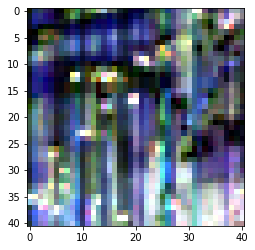

In [16]:
plt.imshow(rgb_arr)

### Obtain histograms for each channel

In [17]:
# Obtain the indexes per channel
# 30 channels per month
idx_per_channel = [list(range(i, 360, 30)) for i in range(30)]
idx_per_channel

[[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330],
 [1, 31, 61, 91, 121, 151, 181, 211, 241, 271, 301, 331],
 [2, 32, 62, 92, 122, 152, 182, 212, 242, 272, 302, 332],
 [3, 33, 63, 93, 123, 153, 183, 213, 243, 273, 303, 333],
 [4, 34, 64, 94, 124, 154, 184, 214, 244, 274, 304, 334],
 [5, 35, 65, 95, 125, 155, 185, 215, 245, 275, 305, 335],
 [6, 36, 66, 96, 126, 156, 186, 216, 246, 276, 306, 336],
 [7, 37, 67, 97, 127, 157, 187, 217, 247, 277, 307, 337],
 [8, 38, 68, 98, 128, 158, 188, 218, 248, 278, 308, 338],
 [9, 39, 69, 99, 129, 159, 189, 219, 249, 279, 309, 339],
 [10, 40, 70, 100, 130, 160, 190, 220, 250, 280, 310, 340],
 [11, 41, 71, 101, 131, 161, 191, 221, 251, 281, 311, 341],
 [12, 42, 72, 102, 132, 162, 192, 222, 252, 282, 312, 342],
 [13, 43, 73, 103, 133, 163, 193, 223, 253, 283, 313, 343],
 [14, 44, 74, 104, 134, 164, 194, 224, 254, 284, 314, 344],
 [15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345],
 [16, 46, 76, 106, 136, 166, 196, 226, 256, 286, 316, 346],


In [18]:
# Extract a subset by specifying the first dimension
temp_array = np.load(trng_dir.format(random_sample.values[0]))
zz = temp_array[idx_per_channel[2]]
zz.shape

(12, 41, 41)

In [19]:
# Check that array slice is the same as expected
np.all(temp_array[2, :, :] == zz[0, :, :])

True

In [20]:
zz_flatten = zz.flatten()
zz_flatten.shape

(20172,)

In [21]:
hist, bin_edges = np.histogram(zz_flatten, 10)

In [22]:
# Counts per bin
# hist

In [23]:
# Bin boundaries - 1 more than the number of edges
bin_edges

array([  577. ,  1532.2,  2487.4,  3442.6,  4397.8,  5353. ,  6308.2,
        7263.4,  8218.6,  9173.8, 10129. ])

Obtain the histograms per channel using 10 randomly selected samples

In [24]:
channel_set = list(set(range(30)) - set([13, 14, 15])) # Remove the QC channels {14, 15, 16}
# Remove channel 22 (0-index) from this set, if required

num_bins = 20
num_channels = len(channel_set)
channel_bins = np.zeros((num_bins+1, num_channels))

for channel_idx in range(num_channels):
    
    actual_channel = channel_set[channel_idx]
    actual_idx = idx_per_channel[actual_channel]
    
    for sample_idx in random_sample:
        temp_array = np.load(trng_dir.format(sample_idx))    
        channel_bins[:, channel_idx] += obtain_hist_bins(temp_array[actual_idx], num_bins)
        
# Obtain the average value for bin edges per channel
channel_bins = channel_bins/len(random_sample)

In [25]:
# For a given sample, convert 360 x 41 x 41 matrix into 27 channels x num_bins x 12 months matrix of count values
#  and standardize per channel

trng_sample_names = trng_data_annot['Field_ID'].values
num_trng_samples = len(trng_sample_names)

for sample_counter in range(num_trng_samples):
# for sample_counter in range(2):
    
    if sample_counter%100 == 0:
        print('Counter = ', sample_counter)
    
    current_sample = trng_sample_names[sample_counter]
    
    # Estimate the 3-d matrix
    current_matrix = generate_3d_matrix(channel_set, idx_per_channel, channel_bins, trng_dir.format(current_sample))
    np.save(trng_dir.format(current_sample + '_Rev'), current_matrix, False)

Counter =  0
Counter =  100
Counter =  200
Counter =  300
Counter =  400
Counter =  500
Counter =  600
Counter =  700
Counter =  800
Counter =  900
Counter =  1000
Counter =  1100
Counter =  1200
Counter =  1300
Counter =  1400
Counter =  1500
Counter =  1600
Counter =  1700
Counter =  1800
Counter =  1900
Counter =  2000
Counter =  2100
Counter =  2200
Counter =  2300
Counter =  2400
Counter =  2500
Counter =  2600
Counter =  2700
Counter =  2800
Counter =  2900


In [26]:
# Load an example data set
temp_array_rev = np.load(trng_dir.format(random_sample.values[0] + '_Rev'))
temp_array_rev.shape

(27, 20, 12)

In [27]:
temp_array_rev[0].sum()

1.0

### Preprocess the samples in the Test Data Set

In [28]:
test_samples = os.listdir('C:/Work/Vivek_Work/Challenge_Data_Sets/Zindi/CGIAR/image_arrays_test/')
len(test_samples)

1055

In [29]:
test_sample_names = [re.sub('.npy', '', current_test_sample) for current_test_sample in test_samples]

In [30]:
test_samples[0:5]

['00PLSKP.npy', '01CNJBI.npy', '02RNO3Z.npy', '04PICIF.npy', '04PWTYK.npy']

In [31]:
test_sample_names[0:5]

['00PLSKP', '01CNJBI', '02RNO3Z', '04PICIF', '04PWTYK']

In [32]:
num_test_samples = len(test_samples)

for sample_counter in range(num_test_samples):
    if sample_counter%100 == 0:
        print('Counter = ', sample_counter)
    
    current_sample = test_sample_names[sample_counter]
    
    # Estimate the 3-d matrix
    current_matrix = generate_3d_matrix(channel_set, idx_per_channel, channel_bins, test_dir.format(current_sample))
    np.save(test_dir.format(current_sample + '_Rev'), current_matrix, False)

Counter =  0
Counter =  100
Counter =  200
Counter =  300
Counter =  400
Counter =  500
Counter =  600
Counter =  700
Counter =  800
Counter =  900
Counter =  1000


In [33]:
# Save test sample names as a csv file
# pd.DataFrame(test_sample_names).to_csv('C:/Work/Vivek_Work/Challenge_Data_Sets/Zindi/CGIAR/Test_Samples.csv', header=False
#                                           , index=False)

In [35]:
# Check that the field IDs in 'SampleSubmission.csv' are the same as that in test_sample_names
test_data_submission = pd.read_csv(in_dir.format('SampleSubmission.csv'))
test_data_submission.head()

len(set(test_sample_names) & set(test_data_submission['Field_ID']))

1055